## Simulación del Examen (Core)

## Fundamentos de Data Science – Práctica para el Examen

### **Contexto:**

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

### **Requisitos:**

1.  **Limpieza de Datos:**

El primer paso en este proceso es usar Python para limpiar los 
datos y dejarlos listos para el análisis. Deben:

- Identificar y abordar cualquier valor duplicado.
- Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
- Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
- Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
- Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

2.  **Exploración de Datos:**

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:


- Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


### **Diccionario de Datos:**

- **user_id:** Identificación única del usuario.
- **app_version:** Versión de la aplicación usada.
- **platform:** Plataforma del dispositivo (Android, iOS).
- **session_duration:** Duración de la sesión en minutos.
- **number_of_sessions:** Número de sesiones en un día.
- **country:** País del usuario.
- **user_feedback:** Puntuación de la experiencia del usuario (1-5).


In [1]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)  # Duración de la sesión en minutos
number_of_sessions = np.random.randint(1, 20, 300)  # Número de sesiones en un día
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)  # Puntuación de la experiencia del usuario (1-5)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")


Datos generados y guardados en 'user_app_data.csv'


In [9]:
# LIMPIEZA DE DATOS

import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
file_path = 'user_app_data.csv'
df = pd.read_csv(file_path)

# 1) Identificar y abordar duplicados
print("Número de filas duplicadas:", df.duplicated().sum())
df = df.drop_duplicates()

# 2) Identificar y abordar datos faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# No hay valores faltantes, pero si los hubiera, podrían rellenarse con la media o moda:
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# 3) Asegurar que todas las columnas coincidan con los tipos de datos esperados
print("\nTipos de datos antes de la conversión:")
print(df.dtypes)

# Verificar que los tipos sean correctos. En este caso ya están correctos. No se necesitan cambios.

# 4) Identificar y abordar inconsistencias en valores categóricos
df['platform'] = df['platform'].str.capitalize()  # Homogeneizar las mayúsculas/minúsculas de la plataforma

# 5) Identificar y abordar puntos de datos inusuales
# Por ejemplo, asegurar que `session_duration` no tenga valores extremadamente altos
df = df[df['session_duration'] <= 10000]  # Filtra valores extraños, ajusta según las reglas de negocio

# Confirmar después de limpiar los datos
print("\nDatos limpios - Resumen:")
print(df.describe())

# Guardar el dataset limpio
df.to_csv('user_app_data_cleaned.csv', index=False)

Número de filas duplicadas: 0

Valores faltantes por columna:
user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64

Tipos de datos antes de la conversión:
user_id                 int64
app_version           float64
platform               object
session_duration        int64
number_of_sessions      int64
country                object
user_feedback           int64
dtype: object

Datos limpios - Resumen:
          user_id  app_version  session_duration  number_of_sessions  \
count  300.000000   300.000000        300.000000          300.000000   
mean   150.500000     1.155000         95.840000            9.596667   
std     86.746758     0.113363         51.922773            5.672853   
min      1.000000     1.000000          1.000000            1.000000   
25%     75.750000     1.100000         51.250000            5.000000   
50%    150.500000     1.200000     

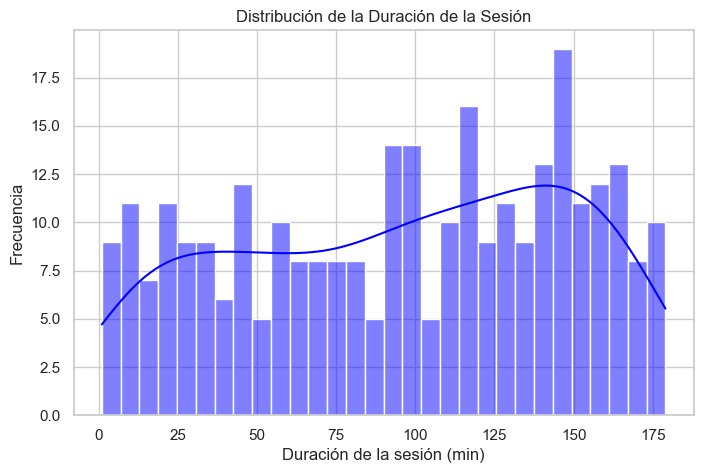

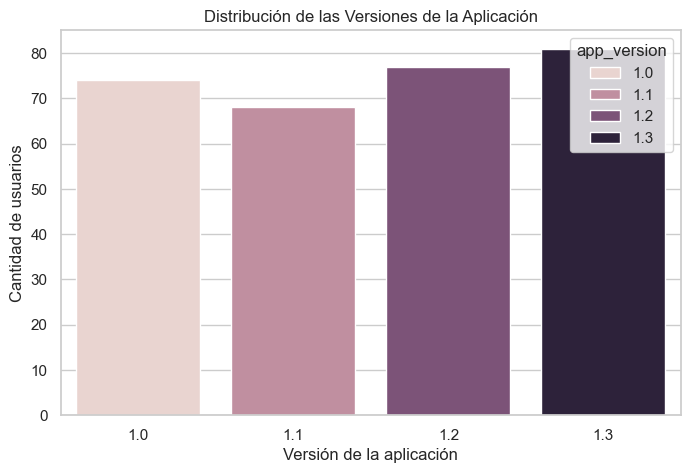

In [10]:
# EXPLORACIÓN DE DATOS

# Configurar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Histograma de la duración de la sesión
plt.figure(figsize=(8, 5))
sns.histplot(df['session_duration'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Duración de la Sesión')
plt.xlabel('Duración de la sesión (min)')
plt.ylabel('Frecuencia')
plt.show()

# Interpretación:
# La distribución muestra que la mayoría de las sesiones duran entre 0 y 100 minutos.
# La densidad cae rápidamente después de los 100 minutos, lo que sugiere que las sesiones más largas son mucho menos comunes.
# La curva KDE (Kernel Density Estimate) sugiere que el patrón de uso está sesgado hacia la derecha, con un pequeño número de sesiones largas.

# Gráfico de barras para las versiones de la aplicación (corregido)
plt.figure(figsize=(8, 5))
sns.countplot(x='app_version', data=df, hue='app_version', dodge=False)  # Eliminado el argumento 'legend=False'
plt.title('Distribución de las Versiones de la Aplicación')
plt.xlabel('Versión de la aplicación')
plt.ylabel('Cantidad de usuarios')
plt.show()

# Interpretación:
# La versión 1.1 de la aplicación tiene el mayor número de usuarios, seguida por la versión 1.2.
# La distribución es bastante equilibrada entre las versiones 1.0, 1.2, y 1.3, pero la versión 1.1 es la más utilizada.
# Este gráfico sugiere que algunos usuarios no han actualizado a las versiones más recientes, y la adopción de la nueva versión 1.3 todavía es menor.



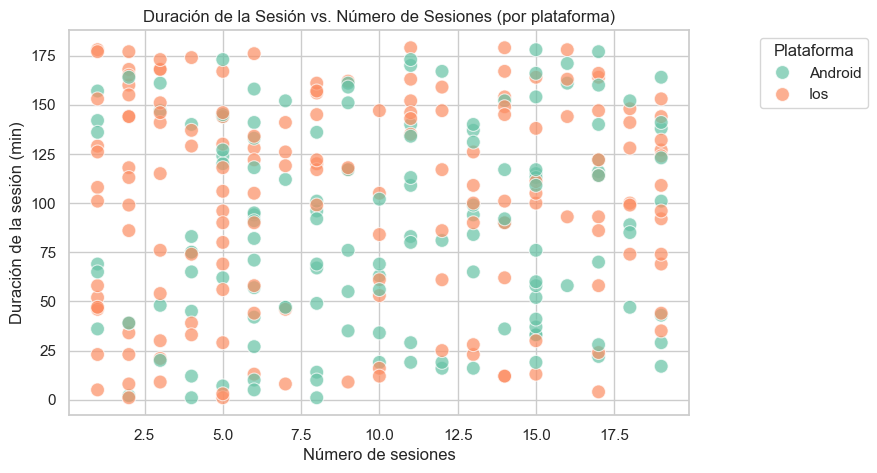

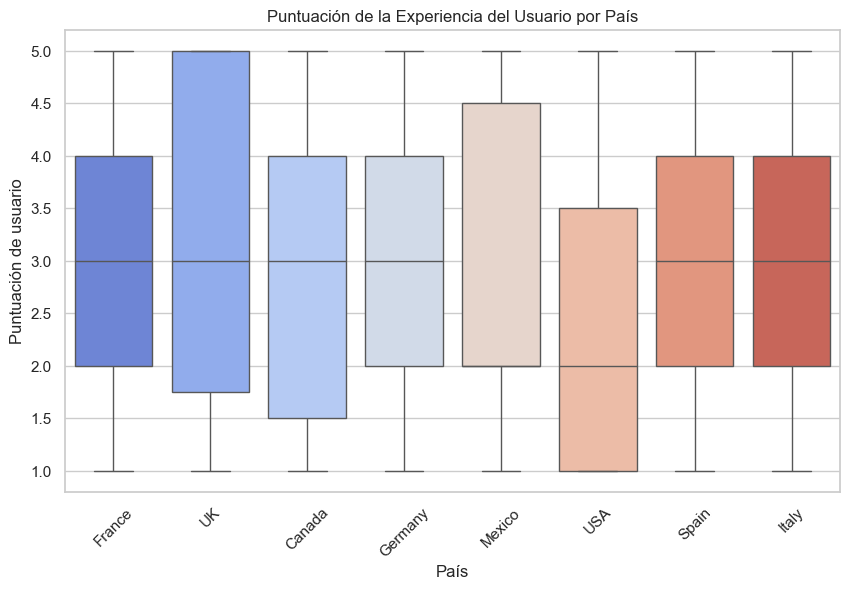

In [11]:
# Gráfico de dispersión (scatterplot) de duración de sesión vs. número de sesiones
# Gráfico de dispersión mejorado
plt.figure(figsize=(8, 5))
sns.scatterplot(x='number_of_sessions', y='session_duration', hue='platform', data=df, palette='Set2', s=100, alpha=0.7)
plt.legend(title='Plataforma', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Duración de la Sesión vs. Número de Sesiones (por plataforma)')
plt.xlabel('Número de sesiones')
plt.ylabel('Duración de la sesión (min)')
plt.show()


# Interpretación:
# No hay una relación clara entre el número de sesiones y la duración de las mismas.
# Los usuarios de ambas plataformas (Android e iOS) tienden a tener menos de 10 sesiones por día.
# Las sesiones más largas no necesariamente corresponden a un mayor número de sesiones diarias.


# Boxplot de la puntuación de experiencia del usuario por país (corregido)
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='user_feedback', hue='country', data=df, palette='coolwarm', dodge=False, legend=False)
plt.title('Puntuación de la Experiencia del Usuario por País')
plt.xlabel('País')
plt.ylabel('Puntuación de usuario')
plt.xticks(rotation=45)
plt.show()

# Interpretación:
# La puntuación de la experiencia varía entre países, siendo más consistente en Estados Unidos y Alemania.
# Países como México y España muestran mayor dispersión en las puntuaciones, reflejando experiencias más diversas.
# Algunos outliers indican usuarios con experiencias significativamente diferentes respecto a la mayoría.
